## Importation des modules 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.covariance import empirical_covariance
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import scale
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.covariance import empirical_covariance
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import scale
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

## Préparation des données d'entraînements

### Teams

On importe les données :

In [2]:
train_home_team_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_away_team_statistics_df.csv', index_col=0)

On retire les 2 premières colonnes (id et league) :

In [3]:
train_home_team = train_home_team_statistics_df.iloc[:,2:]
train_away_team = train_away_team_statistics_df.iloc[:,2:]

On impute les données puis on normalise : 

In [4]:
train_home_team = train_home_team.replace({np.inf:np.nan,-np.inf:np.nan})

imputer = KNNImputer(n_neighbors=10)

train_home_team_nor = scale(train_home_team, axis = 0)

train_home_team_nor_imp = pd.DataFrame(
    imputer.fit_transform(train_home_team_nor),  # Imputation
    columns=train_home_team.columns,            # Conserver les noms des colonnes
    index=train_home_team.index                 # Conserver l'index
)

In [5]:
train_away_team = train_away_team.replace({np.inf:np.nan,-np.inf:np.nan})

train_away_team_nor = scale(train_away_team, axis = 0)

train_away_team_nor_imp = pd.DataFrame(
    imputer.fit_transform(train_away_team_nor),  # Imputation
    columns=train_away_team.columns,            # Conserver les noms des colonnes
    index=train_away_team.index                 # Conserver l'index
)

On crée un unique dataset pour les teams : 

In [6]:
train_home_team_nor_imp.columns = 'HOME_' + train_home_team_nor_imp.columns
train_away_team_nor_imp.columns = 'AWAY_' + train_away_team_nor_imp.columns
train_data_team =  pd.concat([train_home_team_nor_imp,train_away_team_nor_imp],join='inner',axis=1)

In [7]:
train_data_team.head()

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,4.5,2.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


### Player

On importe les données :

In [8]:
train_home_player_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_home_player_statistics_df.csv', index_col=0)
train_away_player_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_away_player_statistics_df.csv', index_col=0)

Puis on supprime les deux premières colonnes (position et nom du joueur) :

In [9]:
train_home_player = train_home_player_statistics_df.iloc[:,4:]
train_away_player = train_away_player_statistics_df.iloc[:,4:]

In [10]:
train_home_player.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,8.0,5.0,0.0,0.0,0.0,0.0,NaN,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,7.0,4.0,0.0,0.0,0.0,6.0,NaN,12.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,NaN,NaN,NaN,NaN
0,0.0,33.0,2.0,0.0,0.0,0.0,0.0,NaN,16.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
0,8.0,27.0,2.0,0.0,8.0,0.0,6.0,NaN,1.0,0.0,...,63.0,0.0,13.0,6.0,17.0,0.0,NaN,NaN,NaN,NaN
0,2.0,23.0,27.0,14.0,8.0,37.0,12.0,NaN,7.0,0.0,...,63.0,17.0,10.0,13.0,27.0,0.0,NaN,NaN,NaN,NaN


On fait la moyenne de tous les joueurs par rapport à chaque match pour ne garder qu'une seule ligne par match :

In [11]:
train_home_player_agg = train_home_player.groupby(level=0).mean(numeric_only=True)
train_away_player_agg = train_away_player.groupby(level=0).mean(numeric_only=True)

On remplit les colonnes vides de 0 :

In [12]:
columns_with_all_nan = train_home_player_agg.columns[train_home_player_agg.isna().all()]

train_home_player_agg[columns_with_all_nan] = train_home_player_agg[columns_with_all_nan].fillna(0)

train_home_player_agg.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,45.500000,16.722222,2.777778,...,36.647059,24.058824,25.352941,14.705882,39.176471,41.764706,NaN,0.0,0.0,0.0
1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,50.000000,17.166667,2.777778,...,3.500000,10.000000,13.611111,8.666667,22.055556,19.833333,NaN,0.0,0.0,0.0
2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,3.333333,12.826087,0.000000,...,53.636364,13.000000,23.954545,11.454545,35.181818,36.590909,NaN,0.0,0.0,0.0
3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,19.750000,19.333333,4.166667,...,19.833333,8.833333,19.111111,17.055556,19.611111,15.555556,NaN,0.0,0.0,0.0
4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,100.000000,17.555556,0.000000,...,19.352941,19.235294,24.352941,15.411765,22.117647,14.588235,NaN,0.0,0.0,0.0


In [13]:
columns_with_all_nan = train_away_player_agg.columns[train_away_player_agg.isna().all()]

train_away_player_agg[columns_with_all_nan] = train_away_player_agg[columns_with_all_nan].fillna(0)

train_away_player_agg.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,7.166667,26.611111,13.555556,7.777778,4.000000,4.055556,7.833333,58.000000,11.277778,0.000000,...,25.117647,23.764706,24.529412,15.941176,32.470588,39.529412,NaN,0.0,0.0,0.0
1,4.722222,27.333333,13.111111,4.444444,5.444444,8.222222,8.611111,30.000000,13.833333,2.777778,...,50.555556,11.722222,24.388889,15.055556,32.333333,29.166667,NaN,0.0,0.0,0.0
2,9.304348,23.000000,17.608696,6.565217,12.086957,8.478261,10.695652,18.666667,12.086957,2.869565,...,25.272727,18.681818,29.727273,10.681818,33.545455,37.545455,NaN,0.0,0.0,0.0
3,4.294118,16.117647,14.294118,6.352941,6.470588,3.058824,6.647059,20.000000,15.000000,8.823529,...,16.625000,23.875000,23.000000,9.750000,30.375000,20.562500,NaN,0.0,0.0,0.0
4,8.666667,29.611111,10.944444,13.277778,13.666667,12.944444,8.444444,47.500000,18.833333,1.833333,...,26.833333,9.166667,19.055556,10.944444,22.666667,21.388889,NaN,0.0,0.0,0.0


On normalise : 

In [15]:
train_home_player_nor = pd.DataFrame(
    scale(train_home_player_agg, axis = 0),  # Normalisation
    columns=train_home_player_agg.columns,            # Conserver les noms des colonnes
    index=train_home_player_agg.index                 # Conserver l'index
)
train_away_player_nor = pd.DataFrame(
    scale(train_away_player_agg, axis = 0),  # Normalisation
    columns=train_away_player_agg.columns,            # Conserver les noms des colonnes
    index=train_away_player_agg.index                 # Conserver l'index
)

In [16]:
train_home_player_nor.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,45.500000,16.722222,2.777778,...,36.647059,24.058824,25.352941,14.705882,39.176471,41.764706,NaN,0.0,0.0,0.0
1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,50.000000,17.166667,2.777778,...,3.500000,10.000000,13.611111,8.666667,22.055556,19.833333,NaN,0.0,0.0,0.0
2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,3.333333,12.826087,0.000000,...,53.636364,13.000000,23.954545,11.454545,35.181818,36.590909,NaN,0.0,0.0,0.0
3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,19.750000,19.333333,4.166667,...,19.833333,8.833333,19.111111,17.055556,19.611111,15.555556,NaN,0.0,0.0,0.0
4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,100.000000,17.555556,0.000000,...,19.352941,19.235294,24.352941,15.411765,22.117647,14.588235,NaN,0.0,0.0,0.0


On impute les données manquantes : 


In [17]:
imputer = KNNImputer(n_neighbors=10)

train_home_player_imp = pd.DataFrame(
    imputer.fit_transform(train_home_player_nor),  # Imputation
    columns=train_home_player_nor.columns,            # Conserver les noms des colonnes
    index=train_home_player_nor.index                 # Conserver l'index
)

In [18]:
train_away_player_imp = pd.DataFrame(
    imputer.fit_transform(train_away_player_nor),  # Imputation
    columns=train_away_player_nor.columns,            # Conserver les noms des colonnes
    index=train_away_player_nor.index                 # Conserver l'index
)

On regroupe en une seule table : 

In [19]:
train_home_player_imp.columns = 'HOME_' + train_home_player_imp.columns
train_away_player_imp.columns = 'AWAY_' + train_away_player_imp.columns

train_data_player =  pd.concat([train_home_player_imp,train_away_player_imp],join='inner',axis=1)

In [20]:
print(train_data_player.shape)

(12303, 604)


In [21]:
train_data_player.head()

,HOME_PLAYER_ACCURATE_CROSSES_season_sum,HOME_PLAYER_ACCURATE_PASSES_season_sum,HOME_PLAYER_AERIALS_WON_season_sum,HOME_PLAYER_ASSISTS_season_sum,HOME_PLAYER_BIG_CHANCES_CREATED_season_sum,HOME_PLAYER_BIG_CHANCES_MISSED_season_sum,HOME_PLAYER_BLOCKED_SHOTS_season_sum,HOME_PLAYER_CAPTAIN_season_sum,HOME_PLAYER_CLEARANCES_season_sum,HOME_PLAYER_CLEARANCE_OFFLINE_season_sum,...,AWAY_PLAYER_STARTING_LINEUP_5_last_match_std,AWAY_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,AWAY_PLAYER_TACKLES_5_last_match_std,AWAY_PLAYER_TOTAL_CROSSES_5_last_match_std,AWAY_PLAYER_TOTAL_DUELS_5_last_match_std,AWAY_PLAYER_YELLOWCARDS_5_last_match_std,AWAY_PLAYER_PUNCHES_5_last_match_std,AWAY_PLAYER_LONG_BALLS_5_last_match_std,AWAY_PLAYER_LONG_BALLS_WON_5_last_match_std,AWAY_PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,45.500000,16.722222,2.777778,...,25.117647,23.764706,24.529412,15.941176,32.470588,39.529412,1.514444,0.0,0.0,0.0
1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,50.000000,17.166667,2.777778,...,50.555556,11.722222,24.388889,15.055556,32.333333,29.166667,2.270395,0.0,0.0,0.0
2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,3.333333,12.826087,0.000000,...,25.272727,18.681818,29.727273,10.681818,33.545455,37.545455,1.185000,0.0,0.0,0.0
3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,19.750000,19.333333,4.166667,...,16.625000,23.875000,23.000000,9.750000,30.375000,20.562500,1.393039,0.0,0.0,0.0
4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,100.000000,17.555556,0.000000,...,26.833333,9.166667,19.055556,10.944444,22.666667,21.388889,1.628382,0.0,0.0,0.0


### Unique Dataset

In [22]:
train_data = pd.concat([train_data_team,train_data_player],join='inner',axis=1)
train_data.to_csv("C:/Users/acach/OneDrive/Bureau/data challenge/train_data_base.csv", index=True)

## On réalise une PCA

In [ ]:
from sklearn.decomposition import PCA

n_pca=248
pca = PCA(n_components=248)


pca.fit(train_data)                                  
train_data_pca=pca.transform(train_data)  

### Target

On importe les données

In [3]:
train_resultat = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Y_train_1rknArQ.csv', index_col=0)
train_scores = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/benchmarl_and_extras/Y_train_supp.csv', index_col=0)

#train_resultat = train_resultat.loc[train_data_team.index]

In [4]:
print(train_resultat.head())

    HOME_WINS  DRAW  AWAY_WINS
ID                            
0           0     0          1
1           0     1          0
2           0     0          1
3           1     0          0
4           0     1          0


On crée une fonction pour convertir sous le format 0,1,2 :

In [5]:
def convertit(y_test):
    vrai_resultat_test = []
    for row in y_test.itertuples(index=True):
        if row.HOME_WINS == 1:
            vrai_resultat_test.append(0)
        if row.DRAW == 1:
            vrai_resultat_test.append(1)
        elif row.AWAY_WINS == 1:
            vrai_resultat_test.append(2)
    return vrai_resultat_test

Puis on convertit :

In [6]:
train_resultat = convertit(train_resultat)

In [7]:
train_resultat[:20]

[2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0]

In [8]:
def proportions(y):
    n_0, n_1, n_2 = 0,0,0
    for i in range(len(y)):
        if y[i] == 0:
            n_0 += 1
        elif y[i] == 1:
            n_1 += 1
        else:
            n_2 += 1
    return n_0, n_1, n_2

proportions(train_resultat)

(5356, 3186, 3761)

## Données tests

In [23]:
test_home_team_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away_team_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Test_Data/test_away_team_statistics_df.csv', index_col=0)


In [24]:
test_home_team = test_home_team_statistics_df.replace({np.inf:np.nan,-np.inf:np.nan})

imputer = KNNImputer(n_neighbors=10)

test_home_team_nor = scale(test_home_team, axis = 0)

test_home_team_nor_imp = pd.DataFrame(
    imputer.fit_transform(test_home_team_nor),  # Imputation
    columns=test_home_team.columns,            # Conserver les noms des colonnes
    index=test_home_team.index                 # Conserver l'index
)

In [25]:
test_away_team = test_away_team_statistics_df.replace({np.inf:np.nan,-np.inf:np.nan})

imputer = KNNImputer(n_neighbors=10)

test_away_team_nor = scale(test_away_team, axis = 0)

test_away_team_nor_imp = pd.DataFrame(
    imputer.fit_transform(test_away_team_nor),  # Imputation
    columns=test_away_team.columns,            # Conserver les noms des colonnes
    index=test_away_team.index                 # Conserver l'index
)

In [26]:
test_home_team_nor_imp.columns = 'HOME_' + test_home_team_nor_imp.columns
test_away_team_nor_imp.columns = 'AWAY_' + test_away_team_nor_imp.columns
test_data_team =  pd.concat([test_home_team_nor_imp,test_away_team_nor_imp],join='inner',axis=1)

In [27]:
test_home_player_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Test_Data/test_home_player_statistics_df.csv', index_col=0)
test_away_player_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Test_Data/test_away_player_statistics_df.csv', index_col=0)


In [28]:
test_home_player_agg = test_home_player_statistics_df.groupby(level=0).mean(numeric_only=True)
test_away_player_agg = test_away_player_statistics_df.groupby(level=0).mean(numeric_only=True)

In [29]:
columns_with_all_nan = test_home_player_agg.columns[test_home_player_agg.isna().all()]

test_home_player_agg[columns_with_all_nan] = test_home_player_agg[columns_with_all_nan].fillna(0)

In [30]:
columns_with_all_nan = test_away_player_agg.columns[test_away_player_agg.isna().all()]

test_away_player_agg[columns_with_all_nan] = test_away_player_agg[columns_with_all_nan].fillna(0)

In [31]:
test_home_player_nor = pd.DataFrame(
    scale(test_home_player_agg, axis = 0),  # Imputation
    columns=test_home_player_agg.columns,            # Conserver les noms des colonnes
    index=test_home_player_agg.index                 # Conserver l'index
)
test_away_player_nor = pd.DataFrame(
    scale(test_away_player_agg, axis = 0),  # Imputation
    columns=test_away_player_agg.columns,            # Conserver les noms des colonnes
    index=test_away_player_agg.index                 # Conserver l'index
)

In [32]:
imputer = KNNImputer(n_neighbors=10)

test_home_player_imp = pd.DataFrame(
    imputer.fit_transform(test_home_player_nor),  # Imputation
    columns=test_home_player_nor.columns,            # Conserver les noms des colonnes
    index=test_home_player_nor.index                 # Conserver l'index
)

In [33]:
test_away_player_imp = pd.DataFrame(
    imputer.fit_transform(test_away_player_nor),  # Imputation
    columns=test_away_player_nor.columns,            # Conserver les noms des colonnes
    index=test_away_player_nor.index                 # Conserver l'index
)

In [34]:
test_home_player_imp.columns = 'HOME_' + test_home_player_imp.columns
test_away_player_imp.columns = 'AWAY_' + test_away_player_imp.columns

test_data_player =  pd.concat([test_home_player_imp,test_away_player_imp],join='inner',axis=1)

In [55]:
test_away_player_imp.columns = test_away_player_imp.columns.str.replace("^AWAY_AWAY_", "", regex=True)

In [35]:
test_data_player =  pd.concat([test_home_player_imp,test_away_player_imp],join='inner',axis=1)

In [36]:
test_data = pd.concat([test_data_team,test_data_player],join='inner',axis=1)
test_data.to_csv("C:/Users/acach/OneDrive/Bureau/data challenge/test_data_base.csv", index=True)

In [37]:
test_data.columns

Index(['HOME_TEAM_SHOTS_TOTAL_season_sum',
       'HOME_TEAM_SHOTS_INSIDEBOX_season_sum',
       'HOME_TEAM_SHOTS_OFF_TARGET_season_sum',
       'HOME_TEAM_SHOTS_ON_TARGET_season_sum',
       'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum',
       'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum',
       'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_FOULS_season_sum',
       ...
       'AWAY_PLAYER_STARTING_LINEUP_5_last_match_std',
       'AWAY_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std',
       'AWAY_PLAYER_TACKLES_5_last_match_std',
       'AWAY_PLAYER_TOTAL_CROSSES_5_last_match_std',
       'AWAY_PLAYER_TOTAL_DUELS_5_last_match_std',
       'AWAY_PLAYER_YELLOWCARDS_5_last_match_std',
       'AWAY_PLAYER_PUNCHES_5_last_match_std',
       'AWAY_PLAYER_LONG_BALLS_5_last_match_std',
       'AWAY_PLAYER_LONG_BALLS_WON_5_last_match_std',
       'AWAY_PLAYER_SHOTS_OFF_TARGET_5_last_match_std'],
      dtype='object', length=884)

## Mes données : 

In [2]:
train_data = pd.read_csv("C:/Users/acach/OneDrive/Bureau/data challenge/train_data.csv", index_col=0)
test_data = pd.read_csv("C:/Users/acach/OneDrive/Bureau/data challenge/test_data.csv", index_col=0)

## Feature Engineering 

On supprime les colonnes égales à 0 

In [9]:
indices_a_supprimer = [326, 327, 328, 337, 377, 378, 379, 388, 428, 429, 430, 477, 478, 479, 488, 528, 529, 530,
 539, 579, 580, 581, 628, 629, 630, 639, 679, 680, 681, 690, 730, 731, 732, 779, 780, 781,
 790, 830, 831, 832, 841, 881, 882, 883]
train_data_cleaned = train_data.drop(train_data.columns[indices_a_supprimer], axis=1)

On fait une anova pour réduire le nombre de features :

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
f_values, p_values = f_classif(train_data_cleaned, train_resultat)

# Définir un seuil de p-value (par exemple, 0.05)
threshold = 0.05

# Sélectionner les features avec des p-values inférieures au seuil
selected_features = train_data_cleaned.columns[p_values < threshold]

print(f"Features sélectionnées : {selected_features}")

train_data_anova = train_data_cleaned[selected_features]

Features sélectionnées : Index(['HOME_TEAM_SHOTS_TOTAL_season_sum',
       'HOME_TEAM_SHOTS_INSIDEBOX_season_sum',
       'HOME_TEAM_SHOTS_OFF_TARGET_season_sum',
       'HOME_TEAM_SHOTS_ON_TARGET_season_sum',
       'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum',
       'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum',
       'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_FOULS_season_sum',
       ...
       'AWAY_PLAYER_PENALTIES_COMMITTED_5_last_match_std',
       'AWAY_PLAYER_PENALTIES_SCORED_5_last_match_std',
       'AWAY_PLAYER_PENALTIES_WON_5_last_match_std',
       'AWAY_PLAYER_SAVES_5_last_match_std',
       'AWAY_PLAYER_SAVES_INSIDE_BOX_5_last_match_std',
       'AWAY_PLAYER_SHOTS_ON_TARGET_5_last_match_std',
       'AWAY_PLAYER_SHOTS_TOTAL_5_last_match_std',
       'AWAY_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std',
       'AWAY_PLAYER_YELLOWCARDS_5_last_match_std',
       'AWAY_PLAYER_PUNCHES_5_last_match_std'],
      dtype='object

Garder 220 features avec une anova :

In [11]:
select_k_best = SelectKBest(score_func=f_classif, k=220)
train_data_reduced = select_k_best.fit_transform(train_data_cleaned, train_resultat)

selected_features = train_data_cleaned.columns[select_k_best.get_support()]

print(f"Features sélectionnées ({len(selected_features)}): {selected_features}")

train_data_anova2 = train_data_cleaned[selected_features]

print(train_data_anova2.shape)

Features sélectionnées (220): Index(['HOME_TEAM_SHOTS_TOTAL_season_sum',
       'HOME_TEAM_SHOTS_INSIDEBOX_season_sum',
       'HOME_TEAM_SHOTS_OFF_TARGET_season_sum',
       'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_PASSES_season_sum',
       'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum',
       'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_ATTACKS_season_sum',
       'HOME_TEAM_DANGEROUS_ATTACKS_season_sum',
       ...
       'AWAY_PLAYER_BIG_CHANCES_MISSED_5_last_match_average',
       'AWAY_PLAYER_GOALS_5_last_match_average',
       'AWAY_PLAYER_GOALS_CONCEDED_5_last_match_average',
       'AWAY_PLAYER_KEY_PASSES_5_last_match_average',
       'AWAY_PLAYER_PASSES_5_last_match_average',
       'AWAY_PLAYER_SHOTS_ON_TARGET_5_last_match_average',
       'AWAY_PLAYER_ACCURATE_PASSES_5_last_match_std',
       'AWAY_PLAYER_ASSISTS_5_last_match_std',
       'AWAY_PLAYER_BIG_CHANCES_CREATED_5_last_match_std',
       'AWAY_PLAYER_GOALS_5_last_match_std'],
     

In [12]:
select_k_best = SelectKBest(score_func=f_classif, k=100)
train_data_reduced = select_k_best.fit_transform(train_data_cleaned, train_resultat)

selected_features3 = train_data_cleaned.columns[select_k_best.get_support()]

train_data_anova3 = train_data_cleaned[selected_features3]


## Modélisation

### knn

In [20]:
# la grille de parametres a regler sont definis dans un dictionnaire (dict)
tuned_parameters = {'n_neighbors': range(2,200)}

my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
nnGrid = GridSearchCV(KNeighborsClassifier(),
                      tuned_parameters,
                      cv=my_kfold,
                     n_jobs=-1)
nnGrid.fit(train_data_anova2, train_resultat)
# le meilleur modele 
print(nnGrid.best_params_)
print(nnGrid.best_score_)


{'n_neighbors': 146}
0.4928872685964877


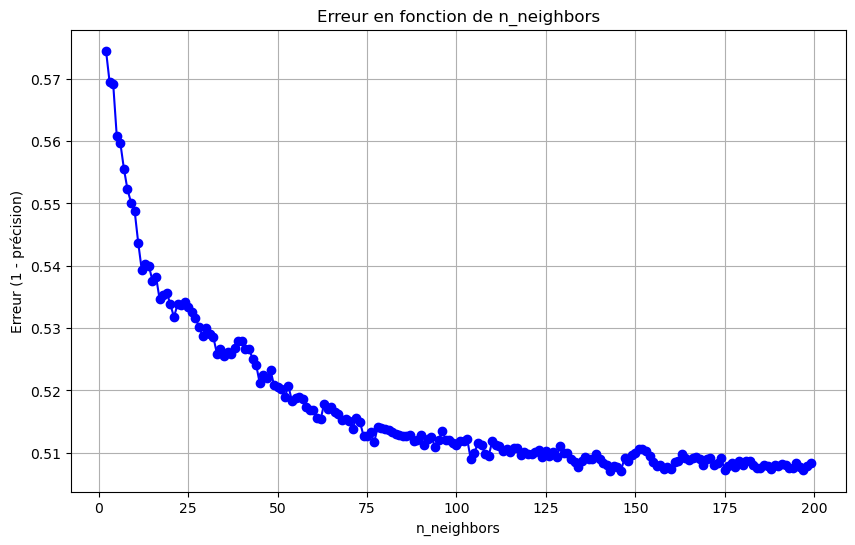

In [21]:
results = nnGrid.cv_results_
neighbors = results['param_n_neighbors'].data
mean_test_scores = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(neighbors, 1 - mean_test_scores, marker='o', linestyle='-', color='b')  # 1 - score pour l'erreur
plt.title('Erreur en fonction de n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Erreur (1 - précision)')
plt.grid(True)
plt.show()

In [25]:
best_model = nnGrid.best_estimator_

### Regression Lasso

In [81]:
x_train, x_test, y_train, y_test = train_test_split(train_data, train_resultat, test_size=0.4)
logreg_cv = LogisticRegressionCV(
    Cs=10, 
    cv=5,  
    penalty='l1',  
    solver='saga', 
    max_iter=1000,  
    random_state=42
)
logreg_cv.fit(x_train, y_train)
y_pred = logreg_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[1797    0  295]
 [ 984    0  309]
 [ 953    1  583]]


In [81]:
### Avec Anova
x_train, x_test, y_train, y_test = train_test_split(train_data_anova3, train_resultat, test_size=0.4)
logreg_cv_ano = LogisticRegressionCV(
    Cs=10, 
    cv=5,  
    penalty='l1',  
    solver='saga', 
    max_iter=1000,  
    random_state=42
)
logreg_cv_ano.fit(x_train, y_train)
y_pred = logreg_cv_ano.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1742    9  403]
 [ 862    9  368]
 [ 792    9  728]]


In [83]:
### Avec Anova sur tout
logreg_cv_ano_tout = LogisticRegressionCV(
    Cs=10, 
    cv=5,  
    penalty='l1',  
    solver='saga', 
    max_iter=1000,  
    random_state=42
)
logreg_cv_ano_tout.fit(train_data_anova3, train_resultat)


LogisticRegressionCV(cv=5, max_iter=1000, penalty='l1', random_state=42,
                     solver='saga')

In [84]:
logreg_cv.score(x_test, y_test)

## que faire pour les matchs nul???

0.48354327509142625

In [82]:
logreg_cv_ano.score(x_test, y_test)

0.5036570499796831

In [86]:
proportions(y_test)


(2092, 1293, 1537)

### Des petites méthodes 

In [22]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

nn = KNeighborsClassifier(n_neighbors=146)

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logit =  LogisticRegression(penalty='l2',solver='saga')

from sklearn import discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')



In [47]:
my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
scores  = model_selection.cross_val_score(gnb, train_data, train_resultat, cv=my_kfold)
print(np.mean(scores))
scores  = model_selection.cross_val_score(logit, train_data, train_resultat, cv=my_kfold)
print(np.mean(scores))
scores  = model_selection.cross_val_score(nn, train_data, train_resultat, cv=my_kfold)
print(np.mean(scores))
scores  = model_selection.cross_val_score(lda, train_data, train_resultat, cv=my_kfold)
print(np.mean(scores))

0.45972366969811046


C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acach\anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.46565545891039745
0.4797204995608039
0.4538691525826712


In [24]:
my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
scores  = model_selection.cross_val_score(gnb, train_data_anova2, train_resultat, cv=my_kfold, n_jobs=-1)
print(np.mean(scores))
scores  = model_selection.cross_val_score(logit, train_data_anova2, train_resultat, cv=my_kfold, n_jobs=-1)
print(np.mean(scores))
scores  = model_selection.cross_val_score(nn, train_data_anova2, train_resultat, cv=my_kfold, n_jobs=-1)
print(np.mean(scores))
scores  = model_selection.cross_val_score(lda, train_data_anova2, train_resultat, cv=my_kfold, n_jobs=-1)
print(np.mean(scores))

0.45517240923830843
0.48955261437261
0.4928872685964877
0.487033213792739


### Bagging

#### Arbre

In [70]:
from sklearn import tree
maxnodes = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
tuned_maxnodes = {'max_leaf_nodes': maxnodes}
my_kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
Cart_grid = GridSearchCV(tree.DecisionTreeClassifier(),
                      tuned_maxnodes,
                      cv=my_kfold)
Cart_grid.fit(train_data,train_resultat)

print(Cart_grid.best_params_)

{'max_leaf_nodes': 4}


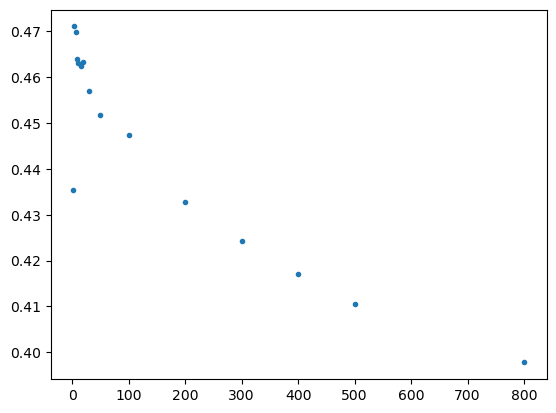

In [71]:
plt.plot(maxnodes, Cart_grid.cv_results_['mean_test_score'],'.')

#### Bagged Trees

In [72]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(train_data, train_resultat, test_size=0.4)

In [76]:
from sklearn.ensemble import BaggingClassifier

base_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 4)

bagged_model = BaggingClassifier(base_tree, n_estimators=100, random_state=42)

# Entraîner le modèle
bagged_model.fit(x_train, y_train)

# Prédictions
y_pred = bagged_model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4729784640390085


#### Bagged knn

Peut être gridsearch sur n_estimator

In [77]:
base_knn = KNeighborsClassifier(n_neighbors=112)

bagged_model = BaggingClassifier(base_knn, n_estimators=100, random_state=42)

# Entraîner le modèle
bagged_model.fit(x_train, y_train)

# Prédictions
y_pred = bagged_model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.47480698902885005


### Random Forest

In [13]:
x_train, x_test, y_train, y_test = train_test_split(train_data_anova2, train_resultat, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,  # Nombre d'arbres dans la forêt
    max_depth=50,     # Profondeur maximale des arbres
    random_state=42,    # Pour la reproductibilité
    n_jobs=-1,
    max_features = 10
)

rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = rf_model.score(x_test,y_test)
print(score)
#gridsearch sur taille minimale d’un noeud et nombre de variables à choisir aléatoirement en chaque noeud

[[1315   36  251]
 [ 639   32  272]
 [ 643   40  463]]
0.4903820102953129


##### On améliore les paramètres : 

In [60]:
maxnodes = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
maxfeatures=range(60,100)

best_oob_score = 0
best_params = {}

for node in maxnodes:
    for feature in maxfeatures:
        rf_model = RandomForestClassifier(
            n_estimators=200,
            max_leaf_nodes=node,
            max_features=feature,
            oob_score=True,
            random_state=42,
            n_jobs=-1
        )
        rf_model.fit(x_train, y_train)
        
        # Calcul de l'erreur OOB
        oob_score = rf_model.oob_score_
        print(f"max_leaf_nodes: {node}, max_features: {feature}, OOB Score: {oob_score}")
        
        if oob_score > best_oob_score:
            best_oob_score = oob_score
            best_params = {'max_leaf_nodes': node, 'max_features': feature}

print("Meilleurs hyperparamètres (OOB):", best_params)

# Étape 4 : Ajustement du modèle final
final_model = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=best_params['max_leaf_nodes'],
    max_features=best_params['max_features'],
    random_state=42,
    n_jobs=-1
)
final_model.fit(x_train, y_train)

# Étape 5 : Évaluation sur l'échantillon test
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'échantillon test :", accuracy)
cm = confusion_matrix(y_test,y_pred)
print(cm)

max_leaf_nodes: 2, max_features: 60, OOB Score: 0.4463539247561542
max_leaf_nodes: 2, max_features: 61, OOB Score: 0.4465861588481189
max_leaf_nodes: 2, max_features: 62, OOB Score: 0.44623780771017185
max_leaf_nodes: 2, max_features: 63, OOB Score: 0.4465861588481189
max_leaf_nodes: 2, max_features: 64, OOB Score: 0.44647004180213656
max_leaf_nodes: 2, max_features: 65, OOB Score: 0.44693450998606593
max_leaf_nodes: 2, max_features: 66, OOB Score: 0.44716674407803064
max_leaf_nodes: 2, max_features: 67, OOB Score: 0.44693450998606593
max_leaf_nodes: 2, max_features: 68, OOB Score: 0.4463539247561542
max_leaf_nodes: 2, max_features: 69, OOB Score: 0.44647004180213656
max_leaf_nodes: 2, max_features: 70, OOB Score: 0.44739897816999535
max_leaf_nodes: 2, max_features: 71, OOB Score: 0.44739897816999535
max_leaf_nodes: 2, max_features: 72, OOB Score: 0.44763121226196007
max_leaf_nodes: 2, max_features: 73, OOB Score: 0.44809568044588943
max_leaf_nodes: 2, max_features: 74, OOB Score: 0.44

In [14]:
# Étape 4 : Ajustement du modèle final
x_train, x_test, y_train, y_test = train_test_split(train_data_anova2, train_resultat, test_size=0.3, random_state=42)
final_model = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=100,
    max_features=69,
    random_state=42,
    n_jobs=-1
)
final_model.fit(x_train, y_train)

# Étape 5 : Évaluation sur l'échantillon test
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'échantillon test :", accuracy)
cm = confusion_matrix(y_test,y_pred)
print(cm)

Précision sur l'échantillon test : 0.489569222432945
[[1336    4  262]
 [ 683    5  255]
 [ 674    6  466]]


In [15]:
for i in range(10):
    x_train,x_test,y_train,y_test = train_test_split(train_data_anova3, train_resultat,test_size=0.4)
    final_model.fit(x_train,y_train)
    y_pred= final_model.predict(x_test)
    print(final_model.score(x_test,y_test))
    print(confusion_matrix(y_test,y_pred))

0.48984152783421375
[[1739   18  410]
 [ 881   17  380]
 [ 804   18  655]]
0.497765136123527
[[1784   37  331]
 [ 868   25  350]
 [ 844   42  641]]
0.47968305566842745
[[1706   12  412]
 [ 888   11  410]
 [ 825   14  644]]
0.4914668833807395
[[1748   14  386]
 [ 883   17  401]
 [ 798   21  654]]
0.4934985778138968
[[1737    9  360]
 [ 908   11  386]
 [ 818   12  681]]
0.48110524177163755
[[1731   28  387]
 [ 917   21  330]
 [ 868   24  616]]
0.49227956115400245
[[1730   13  382]
 [ 916   16  359]
 [ 813   16  677]]
0.48577813896789923
[[1727   34  371]
 [ 895   21  370]
 [ 834   27  643]]
0.4959366111336855
[[1753   32  395]
 [ 851   24  357]
 [ 815   31  664]]
0.4878098334010565
[[1725   21  404]
 [ 904   15  350]
 [ 819   23  661]]


In [16]:
for i in range(10):
    x_train,x_test,y_train,y_test = train_test_split(train_data_anova2, train_resultat,test_size=0.4)
    final_model.fit(x_train,y_train)
    y_pred= final_model.predict(x_test)
    print(final_model.score(x_test,y_test))
    print(confusion_matrix(y_test,y_pred))

0.48435595286468913
[[1742    7  373]
 [ 935    7  338]
 [ 877    8  635]]
0.49959366111336856
[[1779   12  399]
 [ 890    5  366]
 [ 781   15  675]]
0.4888256806176351
[[1736   27  381]
 [ 900   24  291]
 [ 885   32  646]]
0.49085737505079235
[[1723    8  428]
 [ 918    7  375]
 [ 761   16  686]]
0.479276716781796
[[1744    7  349]
 [ 945    4  359]
 [ 897    6  611]]
0.4817147501015847
[[1732   15  392]
 [ 924   11  388]
 [ 822   10  628]]
0.4900446972775295
[[1757    7  451]
 [ 866    7  409]
 [ 768    9  648]]
0.48720032507110933
[[1738   25  369]
 [ 901    9  351]
 [ 862   16  651]]
0.4997968305566843
[[1797   16  376]
 [ 872   16  350]
 [ 823   25  647]]
0.4975619666802113
[[1784   14  331]
 [ 914   20  337]
 [ 859   18  645]]


##### On regarde l'importance des variables :

Importances des variables (Gini) :
                                           Feature  Importance
24        HOME_TEAM_SHOTS_INSIDEBOX_season_average    0.011724
23            HOME_TEAM_SHOTS_TOTAL_season_average    0.011692
164       AWAY_TEAM_SHOTS_INSIDEBOX_season_average    0.009829
173       AWAY_TEAM_BALL_POSSESSION_season_average    0.009554
3             HOME_TEAM_SHOTS_ON_TARGET_season_sum    0.009416
..                                             ...         ...
478    HOME_PLAYER_LONG_BALLS_WON_5_last_match_sum    0.000000
581  HOME_PLAYER_SHOTS_OFF_TARGET_5_last_match_std    0.000000
428              HOME_PLAYER_LONG_BALLS_season_std    0.000000
477        HOME_PLAYER_LONG_BALLS_5_last_match_sum    0.000000
883  AWAY_PLAYER_SHOTS_OFF_TARGET_5_last_match_std    0.000000

[884 rows x 2 columns]


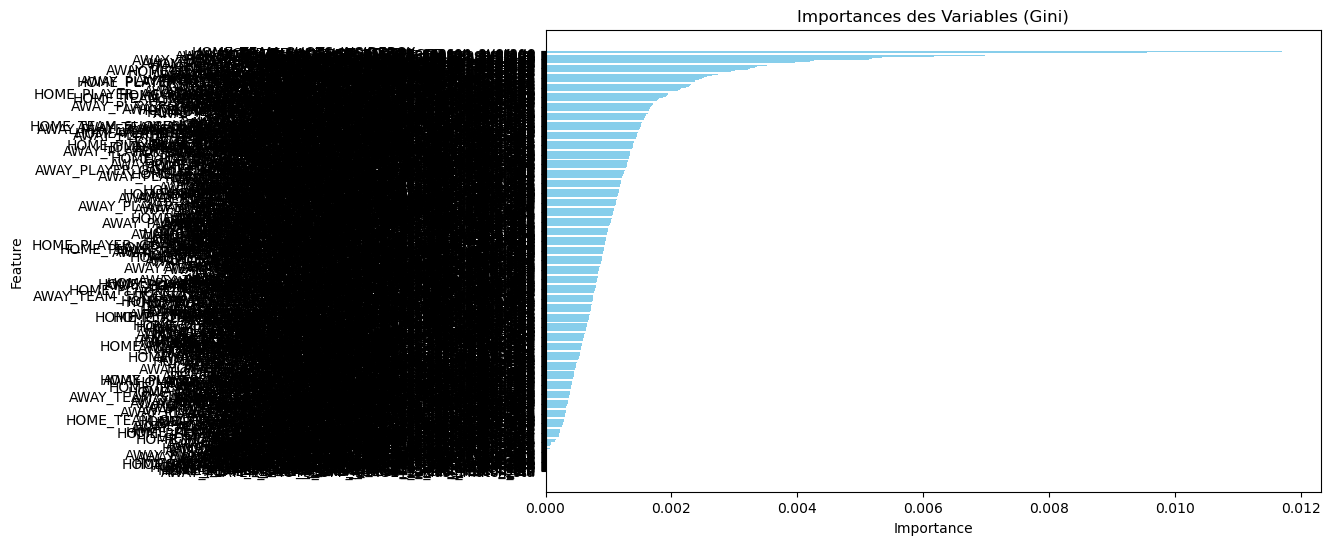

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtenir les importances des variables
importances = final_model.feature_importances_

# Associer les importances aux noms des colonnes
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances sous forme de tableau
print("Importances des variables (Gini) :")
print(importance_df)

# Visualisation des importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importances des Variables (Gini)')
plt.gca().invert_yaxis()  # Inverser pour afficher les plus importantes en haut
plt.show()


## Stacking

In [69]:
from sklearn.ensemble import StackingClassifier
x_train, x_test, y_train, y_test = train_test_split(train_data_anova2, train_resultat, test_size=0.3, random_state=42)
base_model = [
    ('rf', final_model),
    ('nn', KNeighborsClassifier(n_neighbors=146))
]
meta_model = LogisticRegressionCV(
    Cs=10, 
    cv=5,  
    penalty='l1',  
    solver='saga', 
    max_iter=1000,  
    random_state=42
)

stack_model = StackingClassifier(estimators=base_model, final_estimator = meta_model, cv=5)
stack_model.fit(x_train, y_train)
y_pred = stack_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[1336    0  266]
 [ 680    0  263]
 [ 657    0  489]]


In [70]:
stack_model.score(x_test,y_test)

0.49444594960715255

### Réseaux de neurones


Importation des modules de keras:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


Traitement des données:

In [ ]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data_pca, train_scores, train_size=0.5, random_state=42)

train_scores_cate=to_categorical(train_scores)

Modèle de réseau de neurones

In [ ]:

early_stopping = EarlyStopping(
    monitor='accuracy',       
    patience=10000,               
    restore_best_weights=True
)
d=0.75

model = Sequential([

    Dense(n_pca, activation="relu"),
    BatchNormalization(),
    Dropout(d),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(d),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(d),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(d),

    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(d),

    Dense(8, activation="relu"),
    BatchNormalization(),
    Dropout(d),

    Dense(4, activation="relu"),
    BatchNormalization(),
    Dropout(d),
    
    Dense(3, activation="softmax")  
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",  
              metrics=["accuracy"]) 

model.fit(X_train,train_scores,epochs=100000, batch_size=100)

Test des données:

In [ ]:
model.evaluate(X_test,y_test)

## Modèle retenu:

In [ ]:
best_model=final_model

## Soumission

In [ ]:
test_data_cleaned = test_data.drop(test_data.columns[indices_a_supprimer], axis=1)

test_data_anova2 = test_data_cleaned[selected_features]

best_model.fit(train_data_anova2, train_resultat)
predi = best_model.predict(test_data_anova2)

id_start = 12303
ids = list(range(id_start, id_start + len(predi)))

# Transformation des éléments en colonnes HOME_WINS, DRAW, AWAY_WINS
data = []
for pred in predi:
    if pred == 0:
        data.append([1, 0, 0])  # HOME_WINS
    elif pred == 1:
        data.append([0, 1, 0])  # DRAW
    else:
        data.append([0, 0, 1])  # AWAY_WINS

# Création d'un DataFrame
df = pd.DataFrame(data, columns=["HOME_WINS", "DRAW", "AWAY_WINS"])
df.insert(0, "ID", ids)  # Ajout de la colonne ID

# Sauvegarde dans un fichier Excel
output_file = "C:/Users/acach/OneDrive/Bureau/data challenge/rf_anova2_nul.xlsx"
df.to_csv(output_file, index=False)